In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Customer Satisfaction - Airlines Case Study.xlsx')

In [3]:
columns = list(df.columns)

## 1- Finding the best-rated 3 services & the lowest-rated 3 services

In [4]:
services_names = columns[7:len(columns)-2]
characteristics_names= columns[:7]

In [5]:
services_df = df[services_names]
characteristics_df = df[characteristics_names]
satisfacation_df = df[columns[0]]

services_df

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,0,0,0,3,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,5,5,5,3,2,5,2,2,3,3,4,4,4,2
129876,2,3,2,4,2,1,1,3,2,3,3,1,2,1
129877,3,0,3,3,3,2,2,4,4,3,4,2,3,2
129878,3,2,3,2,3,2,2,3,3,2,3,2,1,2


In [6]:
# making a list of series that contains the services and satisfaction levels
li_services = [services_df[services_names[i]] for i in range(len(services_names))]
# this list takes the services list and count the repetitions for each satisfaction level
satis_count = [li_services[i].value_counts() for i in range(len(li_services))]

# goods take satisfication level from 4 to 5
# acceptables take satisfication level 3
# bads take satisfication level from 1 to 2
# not applicable takes satisfication level 0

goods = [count.loc[[5,4]] for count in satis_count]
acceptables = [count.loc[3] for count in satis_count]
bads = [count.loc[[2,1]] for count in satis_count]
not_appicables = [count.iloc[-1] for count in satis_count]

# sum of the goods in the level 4 & 5
# sum of the bads in the level 1 & 2
goods_count = [count.loc[[5,4]].sum() for count in goods]
bads_count = [count.loc[[2,1]].sum() for count in bads]
# avgs of the goods, acceptables, 3-5, bads and not applicables
goods_avg = [(goods_count[i]*100/len(df)).round(2) for i in range(len(goods_count))]
acceptables_avg = [(acceptables[i]*100/len(df)).round(2) for i in range(len(acceptables))]
# 3-5 means the good avgs + acceptable avgs
_3_5 = [(goods_avg[i]+acceptables_avg[i]).round(2) for i in range(len(goods_avg))]
bads_avg = [(bads_count[i]*100/len(df)).round(2) for i in range(len(bads_count))]
not_app_avg = [(not_appicables[i]*100/len(df)).round(2) for i in range(len(not_appicables))]


In [7]:
# making a dictionary for the results
mean_count_dict = {'good counts': goods_count,
                   'good avgs': goods_avg,
                   'acceptable counts': acceptables,
                   'acceptable avgs': acceptables_avg,
                    '3-5': _3_5,
                   'bad counts': bads_count,
                   'bad avgs': bads_avg,
                   'not applicable': not_appicables,
                   'not applicable avgs': not_app_avg}

# making data frame of the results dictionary then sort it by the 3-5 column descending
mean_count_df = pd.DataFrame(data=mean_count_dict, index=services_names)
mean_count_df

,good counts,good avgs,acceptable counts,acceptable avgs,3-5,bad counts,bad avgs,not applicable,not applicable avgs
Seat comfort,46225,35.59,29183,22.47,58.06,49675,38.25,4797,3.69
Departure/Arrival time convenient,56410,43.43,23184,17.85,61.28,43622,33.59,6664,5.13
Food and drink,47563,36.62,28150,21.67,58.29,48222,37.13,5945,4.58
Gate location,49249,37.92,33546,25.83,63.75,47083,36.25,2,0.00
Inflight wifi service,60390,46.50,27602,21.25,67.75,41756,32.15,132,0.10
Inflight entertainment,71710,55.21,24200,18.63,73.84,30992,23.86,2978,2.29
Online support,77073,59.34,21609,16.64,75.98,31197,24.02,1,0.00
Ease of Online booking,74057,57.02,22418,17.26,74.28,33387,25.71,18,0.01
On-board service,72399,55.74,27037,20.82,76.56,30439,23.44,5,0.00
Leg room service,74083,57.04,22467,17.30,74.34,32886,25.32,444,0.34


In [8]:
# the best 3 services for satisfaction levels 4 - 5 avgerages
best3_for_goods = mean_count_df[['good counts', 
                                 'good avgs']].sort_values(by='good avgs', ascending=False).head(3)


# the best 3 services for satisfaction levels 3 - 5 avgerages
best3_for_3_5 = mean_count_df[['good counts', 
                               'good avgs', 
                               'acceptable counts', 
                               'acceptable avgs', 
                               '3-5']].sort_values(by='3-5', ascending=False).head(3)

# the bad 3 services for satisfaction levels 1 - 2 avgerages
bad3 = mean_count_df[['bad counts', 
                      'bad avgs']].sort_values(by='bad avgs', ascending=False).head(3)


best3_for_goods

,good counts,good avgs
Cleanliness,84711,65.22
Baggage handling,83988,64.67
Online support,77073,59.34


In [9]:
best3_for_3_5

,good counts,good avgs,acceptable counts,acceptable avgs,3-5
Cleanliness,84711,65.22,23984,18.47,83.69
Baggage handling,83988,64.67,24485,18.85,83.52
On-board service,72399,55.74,27037,20.82,76.56


In [10]:
bad3

,bad counts,bad avgs
Seat comfort,49675,38.25
Food and drink,48222,37.13
Gate location,47083,36.25


In [11]:
# if you want to save the results as excel file delete the '#' from the 3 lines below. Note: run all the cells above and don't delete the # from this line.
# best3_for_goods.to_excel('best3_for_goods.xlsx')
# best3_for_3_5.to_excel('best3_for_3_5.xlsx')
# bad3.to_excel('bad3.xlsx')

## 2- Finding the diffirence between the characteristics who are satisfied or not.

In [12]:
# put the characteristics in a list as series
li_charc = [characteristics_df[[characteristics_names[0], 
                                characteristics_names[i+1]]] for i in range(len(characteristics_names)-1)]

In [13]:
# finding the quantity of each characteristic and each attribute
charc_count = [pd.DataFrame((li_charc[i].value_counts().sort_index())) for i in [0,1,3,4]]

[                         Female   Male
 satisfied                 22971  35822
 neutral or dissatisfied   42928  28159,
                          Loyal Customer  disloyal Customer
 satisfied                         40713              18080
 neutral or dissatisfied           65387               5700,
                          Business travel  Personal Travel
 satisfied                          37337            21456
 neutral or dissatisfied            52356            18731,
                          Business  Eco Plus   Eco
 satisfied                   18065     35336  5392
 neutral or dissatisfied     44095     22973  4019]

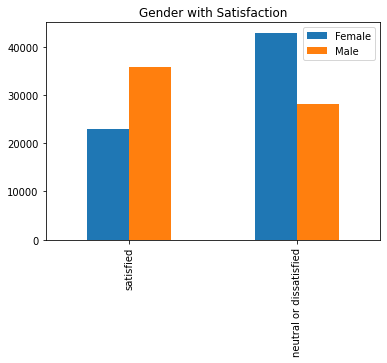

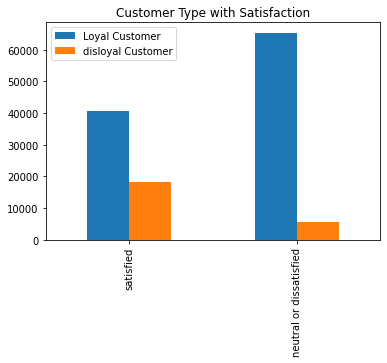

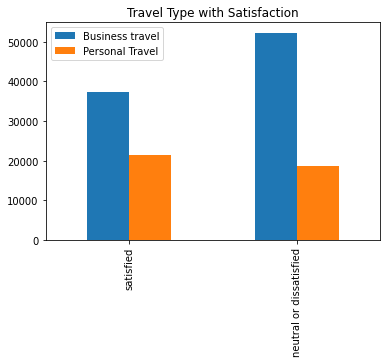

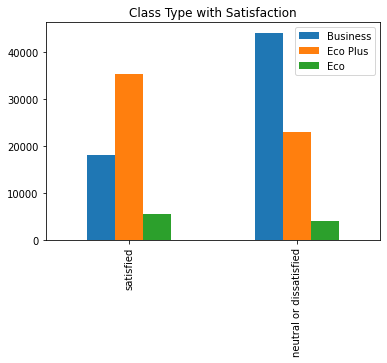

In [22]:
# reorganizing the quantities of the characteristic: gender, customer type, travel type, class 
charc_df = [pd.DataFrame(np.array(charc_count[i]).reshape(2,2), 
                         columns=[charc_count[i].index[2][1], 
                                  charc_count[i].index[1][1]], 
                         index=[charc_count[i].index[2][0], 
                                charc_count[i].index[1][0],]) for i in [0,1,2]]

charc_df.append(pd.DataFrame(np.array(charc_count[3]).reshape(2,3),
                            columns=[charc_count[3].index[3][1],
                                     charc_count[3].index[2][1],
                                     charc_count[3].index[1][1],],
                            index=[charc_count[3].index[3][0],
                                  charc_count[3].index[2][0],]))

# making plots for the characteristics above with the overall satisfaction
titles = ['Gender with Satisfaction', 
          'Customer Type with Satisfaction', 
          'Travel Type with Satisfaction', 
          'Class Type with Satisfaction']
plots = [charc_df[i].plot.bar(title=titles[i]) for i in range(len(charc_df))]
plots;

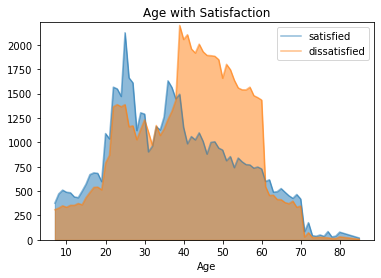

In [15]:
# reorganize the age characteristic and plot it with the overall satisfication 
age_df = li_charc[2].replace(['satisfied', 'neutral or dissatisfied'], [1, 0])
age_counts = age_df.groupby('Overall_Satisfaction').Age.value_counts()
age_0 = age_counts.loc[0].sort_index()
age_1 = age_counts.loc[1].sort_index()
age_0.plot.area(stacked=False)
age_1.plot.area(stacked=False, title= 'Age with Satisfaction').legend(['satisfied', 'dissatisfied']);

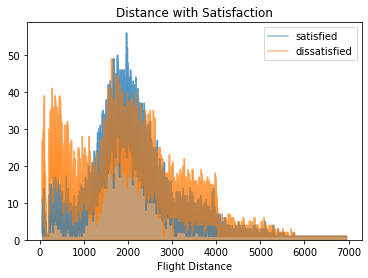

In [16]:
# reorganize the distance characteristic and plot it with the overall satisfication 
dist_df = li_charc[5].replace(['satisfied', 'neutral or dissatisfied'], [1, 0])
dist_counts = dist_df.groupby('Overall_Satisfaction')['Flight Distance'].value_counts()
dist_0 = dist_counts.loc[0].sort_index()
dist_1 = dist_counts.loc[1].sort_index()
dist_0.plot.area(stacked=False)
dist_1.plot.area(stacked=False, title='Distance with Satisfaction').legend(['satisfied', 'dissatisfied']);

## 3- The top 3 services that effecting customer satisfaction

In [17]:
# finding the correlation or the effect between the overall satisfaction and each service with spearman method
services_satis = services_df.corrwith(satisfacation_df.replace(['satisfied', 
                                                                'neutral or dissatisfied'], 
                                                               [1, 0]),method='spearman')

In [18]:
# making a data frame of the results and sort it in descending
services_satis_corr = pd.DataFrame(((services_satis*100).round(2)).sort_values(ascending=False), 
                                   columns=['corr with satisfaction']).reset_index()

In [19]:
# the results
services_satis_corr = services_satis_corr.rename(columns={'index': 'services'})
services_satis_corr

,services,corr with satisfaction
0,Inflight entertainment,57.77
1,Ease of Online booking,42.93
2,Online support,40.23
3,On-board service,35.71
4,Online boarding,33.32
5,Leg room service,30.82
6,Baggage handling,28.71
7,Cleanliness,28.39
8,Seat comfort,26.07
9,Checkin service,26.06


In [20]:
# the top 3 services that effect on the customer satisfaction 
top3 = services_satis_corr.head(3)
top3

,services,corr with satisfaction
0,Inflight entertainment,57.77
1,Ease of Online booking,42.93
2,Online support,40.23
